In [ ]:
from google.colab import drive
drive.mount('/content/drive')

WEEK 1
# **Step 1: Load and Explore the Dataset**
 1) Import Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2) Load the Dataset.

In [2]:
df = pd.read_csv("Task Catagories.csv.csv")  # Adjust filename if different
df.head()

,Task Description,Category,Skill
0,Implement user authentication,backend,spring boot
1,Optimize server performance,backend,asp.net
2,Manage database operations,backend,django
3,Implement user authentication,backend,api
4,Build a microservice,backend,kotlin


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Task Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Skill').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Skill'].value_counts()
    for x_label, grp in _df_2.groupby('Task Description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Task Description')
_ = plt.ylabel('Skill')

3) Basic Exploration

In [3]:
df.info()           # Check data types and non-null counts
df.shape            # Rows and columns
df.columns          # Column names
df.describe()       # Stats for numeric columns
df.isnull().sum()   # Check for missing values
df.duplicated().sum()  # Check for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20122 entries, 0 to 20121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task Description  20122 non-null  object
 1   Category          20122 non-null  object
 2   Skill             20122 non-null  object
dtypes: object(3)
memory usage: 471.7+ KB


np.int64(19333)

#**Step 2: Data Cleaning**
 1) Remove Duplicates

In [4]:
df = df.drop_duplicates()

2**)  Drop Irrelevant or Empty Columns**

In [5]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'Timestamp'], errors='ignore')

**3)Handle Missing Data.**

In [7]:
df = df.dropna(subset=['Task Description'])  # Drop rows with missing task descriptions

**4)Normalize Text**

In [9]:
df['Task Description'] = df['Task Description'].str.lower().str.strip()

# **Step 3: NLP Preprocessing**
1) Import NLP Tools

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**2)Preprocess Function**

In [15]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return " ".join(tokens)

df['clean_task'] = df['Task Description'].apply(preprocess)
df[['Task Description', 'clean_task']].head()

,Task Description,clean_task
0,implement user authentication,implement user authent
1,optimize server performance,optim server perform
2,manage database operations,manag databas oper
3,implement user authentication,implement user authent
4,build a microservice,build microservic


# Quick EDA Visuals.
for most common Words.

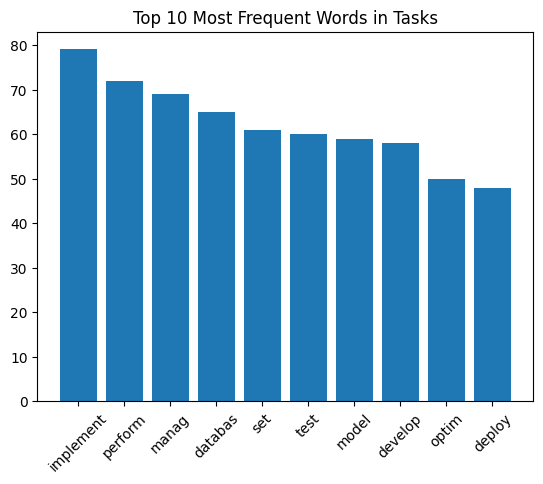

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = " ".join(df['clean_task']).split()
word_freq = Counter(all_words)
most_common = word_freq.most_common(10)

words, counts = zip(*most_common)
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words in Tasks")
plt.xticks(rotation=45)
plt.show()

WEEK 2
# **Feature Extraction**
1)TF-IDF Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  # You can increase max_features if needed
X = vectorizer.fit_transform(df['clean_task'])   # This is your input feature matrix

2)Labels

In [19]:
y = df['Category']

# **Task Classification**
1)Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2)Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

3)Support Vector Machine (SVM)

In [22]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# For Naive Bayes
print("Naive Bayes Metrics:")
print(classification_report(y_test, y_pred_nb))

# For SVM
print("SVM Metrics:")
print(classification_report(y_test, y_pred_svm))

Naive Bayes Metrics:
                         precision    recall  f1-score   support

                  ai/ml       0.96      0.96      0.96        24
                backend       0.87      0.96      0.92        28
                  cloud       1.00      0.67      0.80         3
database administration       0.92      1.00      0.96        11
             deployment       0.86      1.00      0.92        12
                 devops       1.00      0.84      0.91        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      1.00      1.00        15
                testing       1.00      1.00      1.00        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy                           0.95       158
              macro avg       0.87      0.85      0.86       158
           weighted avg       0.95      0.95      0.95       158

S

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m